# Observations
## Observation 1
## Observation 2
## Observation 3

In [13]:
# Imports 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os as os

# Hide warning messages in notebook.
import warnings
warnings.filterwarnings('ignore')

# Input files and constants.
departments_csv = "data/departments.csv"
dept_emp_csv = "data/dept_emp.csv"
dept_manager_csv = "data/dept_manager.csv"
employees_csv = "data/employees.csv"
salaries_csv = "data/salaries.csv"
titles_csv = "data/titles.csv"

output_folder = "output"

In [14]:
# Create the output folder if necessary
try:
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        print (f"Creating folder {output_folder}")
    else:
        print (f"Folder \"{output_folder}\" already exists.")
except Exception as ex:
    print(f"{ex}")
    print (f"Folder \"{output_folder}\" not created.")

Folder "output" already exists.


In [30]:
try:
    departments_df = pd.read_csv(departments_csv, error_bad_lines=True)
    dept_emp_df = pd.read_csv(dept_emp_csv, error_bad_lines=True)
    dept_manager_df = pd.read_csv(dept_manager_csv, error_bad_lines=True)
    employees_df = pd.read_csv(employees_csv, error_bad_lines=True)
    salaries_df = pd.read_csv(salaries_csv, error_bad_lines=True)
    titles_df = pd.read_csv(titles_csv, error_bad_lines=True)
    print("File reading complete.")
except Exception as ex:
    print("{ex}")

File reading complete.


In [29]:
departments_df.head(2)

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance


In [22]:
dept_emp_df.head(2)

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01


In [23]:
dept_manager_df.head(2)

,dept_no,emp_no,from_date,to_date
0,d001,110022,1985-01-01,1991-10-01
1,d001,110039,1991-10-01,9999-01-01


In [24]:
employees_df.head(2)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21


In [25]:
salaries_df.head(2)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03


In [26]:
titles_df.head(2)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01


In [1]:

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_trial_complete = pd.merge(clinical_trial_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
clinical_trial_complete.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril


In [2]:
# Take a look t the merged data.
print ("Quick check of merged data")
print(clinical_trial_complete.describe())
# Look for null data.
print(clinical_trial_complete.isnull().sum())


Quick check of merged data
         Timepoint  Tumor Volume (mm3)  Metastatic Sites
count  1906.000000         1906.000000       1906.000000
mean     19.538300           50.468120          1.018363
std      14.064786            8.869571          1.135991
min       0.000000           22.050126          0.000000
25%       5.000000           45.000000          0.000000
50%      20.000000           48.991921          1.000000
75%      30.000000           56.288484          2.000000
max      45.000000           78.567014          4.000000
Mouse ID              0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
Drug                  0
dtype: int64


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_time_group = clinical_trial_complete.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
drug_time_df = pd.DataFrame(drug_time_group)
# Preview DataFrame
drug_time_df.reset_index(inplace=True)
print("Mean Tumor Volume")
drug_time_df.head()

Mean Tumor Volume


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_err_group = clinical_trial_complete.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
std_err_df = pd.DataFrame(std_err_group)
std_err_df.reset_index(inplace=True)
# Preview DataFrame
print("Standard Error")
std_err_df.head()

Standard Error


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
# This is for the Mean data.
druglist = drug_time_df["Drug"].unique().tolist()
druggroup = drug_time_df.groupby(["Drug"])
dictbydrug = {}
dictbydrug["Timepoint"] = druggroup.get_group("Capomulin")["Timepoint"].values.tolist()

# Look at each group and get the mean data.
for each in druglist:
    vallist = druggroup.get_group(each)["Tumor Volume (mm3)"].values.tolist()
    dictbydrug[each] = vallist

volume_by_drug_df = pd.DataFrame(dictbydrug)
volume_by_drug_df.set_index('Timepoint',inplace=True)
volume_by_drug_df = volume_by_drug_df.rename_axis("Drug", axis="columns")

# Preview that Reformatting worked
print("Mean Tumor Volume")
volume_by_drug_df.head()

Mean Tumor Volume


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
# Minor Data Munging to Re-Format the Data Frames
# This is for the Std Err data.
druglist = std_err_df["Drug"].unique().tolist()
druggroup = std_err_df.groupby(["Drug"])
dictbydrug = {}
dictbydrug["Timepoint"] = druggroup.get_group("Capomulin")["Timepoint"].values.tolist()

for each in druglist:
    vallist = druggroup.get_group(each)["Tumor Volume (mm3)"].values.tolist()
    dictbydrug[each] = vallist

stderr_by_drug_df = pd.DataFrame(dictbydrug)
stderr_by_drug_df.set_index('Timepoint',inplace=True)
stderr_by_drug_df = stderr_by_drug_df.rename_axis("Drug", axis="columns")

# Preview that Reformatting worked
print("Standard Error Tumor Volume")
stderr_by_drug_df.head()

Standard Error Tumor Volume


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [7]:
# A dictionary witht the drugs of intererst and plot settings.
# Graphs will plot any added entries to this dictionary.
drug_trace={} #[drug] = marker, markercolor, markersize, linecolor linewidth
drug_trace['Capomulin'] = ['.', 'red', 9, 'red', 1]
drug_trace['Infubinol'] = ['^', 'blue', 5, 'blue', 1]
drug_trace['Ketapril'] = ['s', 'green', 5, 'green', 1]
drug_trace['Placebo'] = ['d', 'black', 5, 'black', 1]

In [8]:
# Use this method to create a plot with mean and std error traces.
# mean_df - a dataframe with mean data in columns with drug name as the column name.
# stdErr_df - a dataframe with standard error data in columns with drug name as the column name.
# traces - a dictionary with drug names as keys and plot settings as values.
# returns plt to the caller titling and labeling.
def create_mean_error_plot(mean_df, stdErr_df, traces):
    
    fig, ax = plt.subplots()
    x_axis = mean_df.index.tolist()
    for key, val in traces.items():
        means = mean_df[key].values.tolist()
        stderr = stdErr_df[key].values.tolist()
        ax.errorbar(x_axis, means, stderr, fmt=".", color=val[1], linewidth=0.5)
        plt.plot( x_axis, key, data=mean_df, marker=val[0], markerfacecolor=val[1], markersize=val[2], color=val[3], linewidth=val[4])

    ax.grid(axis='y', linestyle='-', linewidth='0.5', color='grey')
    plt.legend()

    return plt

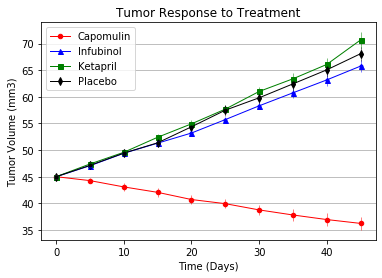

In [9]:
aplt = create_mean_error_plot(volume_by_drug_df, stderr_by_drug_df, drug_trace)
aplt.xlabel('Time (Days)')
aplt.ylabel('Tumor Volume (mm3)', multialignment='center')
aplt.title("Tumor Response to Treatment")
aplt.savefig('Tumor_Response_to_Treatment.png')
aplt.show()

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_group = clinical_trial_complete.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
mean_met_group_df = pd.DataFrame(mean_met_group)

# Preview DataFrame
mean_met_group_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_err_met_group = clinical_trial_complete.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
std_err_met_group_df = pd.DataFrame(std_err_met_group)
# Preview DataFrame
std_err_met_group_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [12]:
# Minor Data Munging to Re-Format the Data Frames
reIndexed_df = mean_met_group_df.reset_index()
druglist = reIndexed_df["Drug"].unique().tolist()
druggroup = reIndexed_df.groupby(["Drug"])
dictbydrug = {}
dictbydrug["Timepoint"] = druggroup.get_group("Capomulin")["Timepoint"].values.tolist()
for each in druglist:
    vallist = druggroup.get_group(each)["Metastatic Sites"].values.tolist()
    dictbydrug[each] = vallist
dictbydrug

fmt_mean_met_df = pd.DataFrame(dictbydrug)
fmt_mean_met_df.set_index('Timepoint',inplace=True)
fmt_mean_met_df = fmt_mean_met_df.rename_axis("Drug", axis="columns")

# Preview that Reformatting worked
print("Mean Metestatic")
fmt_mean_met_df.head()

Mean Metestatic


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [13]:
# Minor Data Munging to Re-Format the Data Frames
reIndexed_df = std_err_met_group_df.reset_index()
druglist = reIndexed_df["Drug"].unique().tolist()
druggroup = reIndexed_df.groupby(["Drug"])
dictbydrug = {}
dictbydrug["Timepoint"] = druggroup.get_group("Capomulin")["Timepoint"].values.tolist()
for each in druglist:
    vallist = druggroup.get_group(each)["Metastatic Sites"].values.tolist()
    dictbydrug[each] = vallist
dictbydrug

fmt_stderr_met_df = pd.DataFrame(dictbydrug)
fmt_stderr_met_df.set_index('Timepoint',inplace=True)
fmt_mean_stderr_df = fmt_stderr_met_df.rename_axis("Drug", axis="columns")

# Preview the Data Frame
print("Metestatic Std Err")
fmt_stderr_met_df.head()

Metestatic Std Err


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


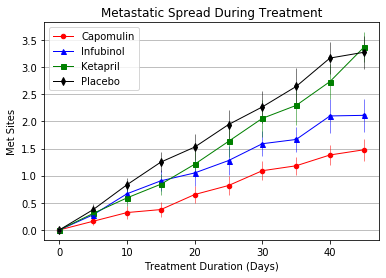

In [14]:
the_plot =  create_mean_error_plot(fmt_mean_met_df, fmt_stderr_met_df, drug_trace)

the_plot.xlabel('Treatment Duration (Days)')
the_plot.ylabel('Met Sites', multialignment='center')
the_plot.title("Metastatic Spread During Treatment")
the_plot.savefig('Metastatic_Spread_During_Treatment.png')
the_plot.show()

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count_group = clinical_trial_complete.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
# Convert to DataFrame
mouse_count_group_df = pd.DataFrame(mouse_count_group)
mouse_count_group_df.reset_index(inplace=True)

# Preview DataFrame
mouse_count_group_df.head(5)


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
# Minor Data Munging to Re-Format the Data Frames
druglist = mouse_count_group_df["Drug"].unique().tolist()
druggroup = mouse_count_group_df.groupby(["Drug"])
dictbydrug = {}
dictbydrug["Timepoint"] = druggroup.get_group("Capomulin")["Timepoint"].values.tolist()
for each in druglist:
    vallist = druggroup.get_group(each)["Mouse ID"].values.tolist()
    dictbydrug[each] = vallist
dictbydrug

mouse_count_by_drug_df = pd.DataFrame(dictbydrug)
mouse_count_by_drug_df.set_index('Timepoint',inplace=True)
mouse_count_by_drug_df = mouse_count_by_drug_df.rename_axis("Drug", axis="columns")

# Preview the Data Frame
mouse_count_by_drug_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [17]:
# Function to create the percentages graph
# count_df - the input data frame.
# traces - the data to be plotted. (dictionary drug_trace)
def create_percentages_plot(count_df, traces):
    
    fig, ax = plt.subplots()
    x_axis = count_df.index.tolist()
    for key, val in traces.items():
        m_starting = count_df[key][0] #use the starting value as the devisor.
        percent = (count_df[key].values / m_starting) * 100  #npy arrays does division on each element.
        plt.plot( x_axis, percent, marker=val[0], markerfacecolor=val[1], markersize=val[2], color=val[3], linewidth=val[4], label=key)

    ax.grid(linestyle='-', linewidth='0.5', color='grey')


    return plt


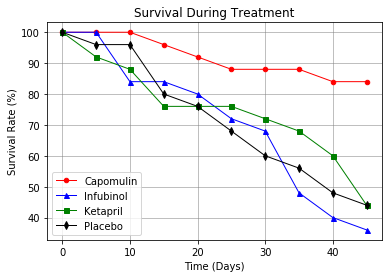

In [18]:
# Create the survival percentage rate graph
the_plot =  create_percentages_plot(mouse_count_by_drug_df, drug_trace)

the_plot.xlabel('Time (Days)')
the_plot.ylabel('Survival Rate (%)', multialignment='center')
the_plot.title("Survival During Treatment")
the_plot.legend(loc='lower left')

the_plot.savefig('Survival_During_Treatment.png')

the_plot.show()

## Summary Bar Graph

In [19]:
# This function puts numbers in the colored area of the bar chart.
# bars - The list of bars returned by ax.bar(...)
# ax - the axis object from plt.
def put_numbers_on_bars(bars, ax):
    for bar in bars:
        barval = int(bar.get_height())
        barlabel = ('%d' % barval) + "%"
        
        if (barval < 0):  #set the label for bars with negative values.
            offset = -8
            ax.text(bar.get_x() + bar.get_width()/2., offset, barlabel, ha='center', va='bottom', color='white')
        elif (barval > 0):  #set the label for bars with positive and values.
            offset = 2
            ax.text(bar.get_x() + bar.get_width()/2., offset, barlabel, ha='center', va='bottom', color='white')


In [20]:
# Create the bar graph showing the percent of tumor volume change.
# dataframe - The complete dataframe. 
def create_percentage_bar_graph(dataframe, ax):
    # Divide the first value for each drug by the last value.
    percents_series = ((dataframe.iloc[-1] / dataframe.iloc[0]) - 1) * 100
    percents_dict = percents_series.to_dict()
    posy_data = []
    negy_data = []
    xticklabels = []

# Separate the positive from the negative bar values and capture the labels.
    for key, val in drug_trace.items():
        xticklabels.append(key)
        if(percents_dict[key] < 0.0):
            posy_data.append(0) 
            negy_data.append(percents_dict[key])
        else:
            posy_data.append(percents_dict[key]) 
            negy_data.append(0)
# Get the range of bars.       
    x_axis = np.arange(len(xticklabels))

    width =  1  #The bar takes up its full width.


#Get the positive and negative bars lists.
    neg_bars = ax.bar(x_axis + width, negy_data, width, color='g')  #green for negative
    pos_bars = ax.bar(x_axis + width, posy_data, width, color='r')  #red for positive

# Put the numbering on the bars.
    put_numbers_on_bars(neg_bars, ax)
    put_numbers_on_bars(pos_bars, ax)
    ax.set_xticks(x_axis + width * 1.5)
    ax.set_xticklabels(xticklabels)


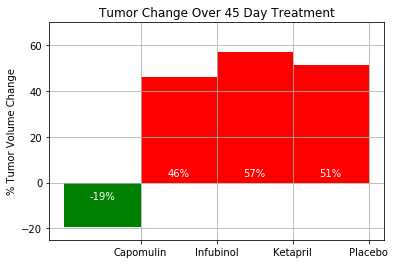

In [21]:
 # Create the bar graph
fig, ax = plt.subplots()
create_percentage_bar_graph(volume_by_drug_df, ax)
# Add the labeling and touch it up.
ax.set_ylim([-25,70])
ax.grid()
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
plt.savefig('Tumor_Change_Over_45_Day_Treatment.png')
plt.show()